In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.tree import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# 1. Introduction
**Fictional perspective for why research is being conducted on the Snap Chat political ads library**


We have been hired by a political group that wants to begin advertising on snapchat in order to boost support. Their goals for this analysis are to determine how effective political ads are on the snapchat platform and what type of demographics are targeted and what demographics might be able to be reached. The primary objective of our team in regards to the 2024 snapchat political data set is to determine what major variables in the data have the most impact on engagement. Variables such as spending on ads, demographics, region, etc. These variables help to determine the best course of action when trying to create effective political ads on major social media platform such as snapchat. This information is relevant because any political campaign who's objective it is to improve the accessibility and awareness of the political cause that they support through advertisement will want to know what to focus on. We will be able to determine this with our dataset that we received from Snap Inc. which provides us with examples of ads posted by different groups and what the result of posting the ads were.



The origin or recorder of the data is Snap Inc. as part of their political ads library initiative. The dataset includes variables such as expenditure on ads, the organizations paying for the ads, start and end dates of the ad campaign and other relavent info.

## Research Questions

1. Do Snapchat advertisements with specific criteria such as age, gender receive more engagement compared to those that don't have a specific demographic in mind? **(Pandas and data visualization)**
   - Context: Understanding the impact of demographic targeting on ad engagement is crucial for optimizing advertising strategies. If ads tailored to target specific groups or genders perform better advertisers might invest more in using them
__________________________________________________________________
2. How does duration of an ad impact average impressions **(Pandas/Matplotlib)**
   - Context: Determining how duration affects impressions - visualizing
___________________________________________________________________
3. Which regions and age brackets have the highest impressions-to-spend ratio? **(Pandas/Matplotlib)**
   - Context: Finding high ROI regions and age brackets can guide ad campaign into prioritizing ad target to these areas/ages
___________________________________________________________________
4. What factors (e.g age bracket, region, spending, language etc.) most influence the number of impressions an ad recieves? **(Linear Regression)**
   - Context: Understanding the key drivers of impressions helps optimize future campaigns for maximum reach

# 2. Dataset


In [ ]:
df = pd.read_csv('PoliticalAds.csv', parse_dates=['StartDate', 'EndDate']) #could index by paying advertizer name

df = df[['Currency Code', 'Spend', 'Impressions', 'StartDate', 'EndDate',
           'OrganizationName', 'BillingAddress', 'CandidateBallotInformation',
           'PayingAdvertiserName', 'Gender', 'AgeBracket', 'CountryCode', 'OsType', 'Language',
          'Regions (Included)', 'Regions (Excluded)', 'Metros (Included)', 'Metros (Excluded)']]

df['Duration'] = (df['EndDate'] - df['StartDate']).dt.days.fillna(0)
df = df[df["Duration"] >= 0]
df.head()

,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,OsType,Language,Regions (Included),Regions (Excluded),Metros (Included),Metros (Excluded),Duration
0,USD,1275.0,165918.0,2024-08-06 04:01:55+00:00,2024-09-03 03:59:00+00:00,Harris for President,US,Kamala Harris,Harris for President,NaN,18-29,united states,NaN,NaN,NaN,NaN,NaN,NaN,27.0
1,USD,186.0,16203.0,2024-03-18 04:00:38+00:00,2024-05-28 03:59:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,Climate Power,NaN,18+,united states,NaN,en,"Arizona,Georgia,Michigan,North Carolina,Nevada...",NaN,NaN,"Flint - Saginaw - Bay City,Lansing",70.0
2,USD,782.0,41256.0,2024-07-02 14:42:02+00:00,NaT,Stories Marketing,"4509 Kings Lake Ct,Chattanooga,37416,US",We do not provide abortion services,Crossroads PRC,FEMALE,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,USD,1604.0,87755.0,2024-05-28 18:32:11+00:00,2024-08-05 03:59:00+00:00,Bully Pulpit Interactive,"1445 New York Ave NW,Washington,20005,US",NaN,Climate Power,NaN,NaN,united states,NaN,en,"Arizona,Georgia,North Carolina,Nevada",NaN,NaN,NaN,68.0
4,USD,8.0,483.0,2024-10-24 20:30:00+00:00,2024-10-27 03:59:00+00:00,Harris for President,US,Kamala Harris,Harris for President,NaN,18+,united states,NaN,NaN,Pennsylvania,NaN,NaN,NaN,2.0


## Question 1

Do Snapchat advertisements with specific criteria such as age, gender receive more engagement compared to those that don't have a specific demographic in mind? **(Pandas and data visualization)**

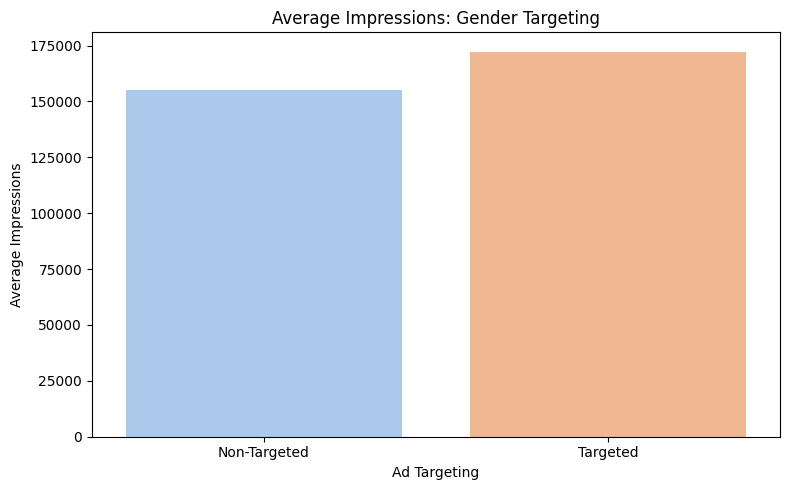

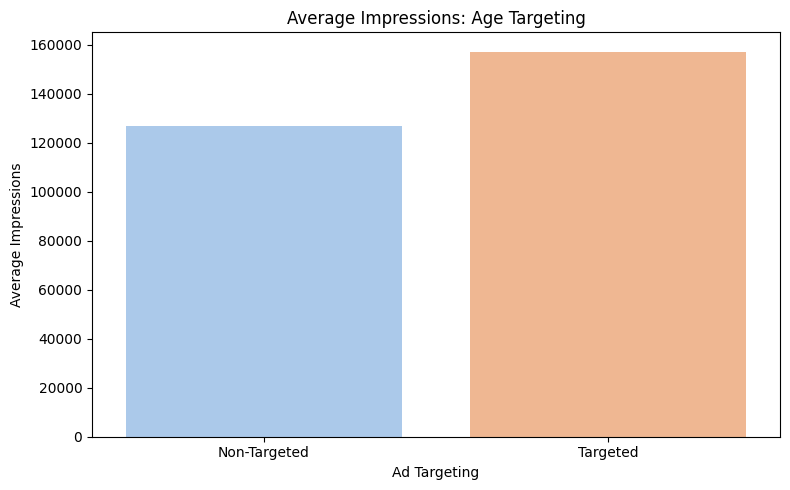

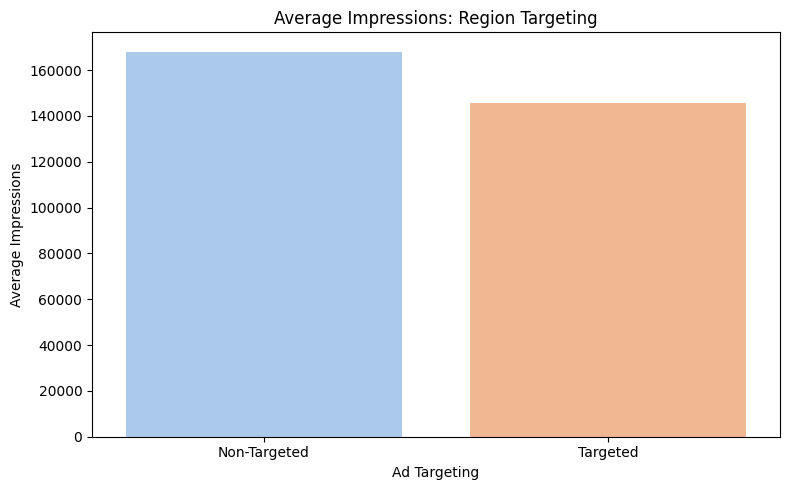

In [ ]:
def categorize(col):
    return (~df[col].isna()).astype(int) #makes it so that 0 means NaN and 1 means there is a value instead of vice versa ~ , makes it much less confusing

df['Gender_Targeting'] = categorize('Gender')
df['Age_Targeting'] = categorize('AgeBracket')
df['Region_Targeting'] = categorize('Regions (Included)')

#groupby each target feature in order to get avg impressions for each group: yes target feature and no target feature
tgender = df.groupby('Gender_Targeting')['Impressions'].mean().reset_index()
tage = df.groupby('Age_Targeting')['Impressions'].mean().reset_index()
tregion = df.groupby('Region_Targeting')['Impressions'].mean().reset_index()

#giving each of the 1s and 0s labels through mapping
tgender['Targeting'] = tgender['Gender_Targeting'].map({1: 'Targeted', 0: 'Non-Targeted'}) #any 1 values which are are defined with the ~df[col] function above
#are labeled as targeted and 0 is non targeted

tage['Targeting'] = tage['Age_Targeting'].map({1: 'Targeted', 0: 'Non-Targeted'})
tregion['Targeting'] = tregion['Region_Targeting'].map({1: 'Targeted', 0: 'Non-Targeted'})

#plotting function to plot every targeting category
def plot(summary, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=summary, x='Targeting', y='Impressions', hue='Targeting', palette='pastel')
    plt.title(title)
    plt.xlabel('Ad Targeting')
    plt.ylabel('Average Impressions')
    plt.tight_layout()
    plt.show()

#getting the bar plots
plot(tgender, 'Average Impressions: Gender Targeting')
plot(tage, 'Average Impressions: Age Targeting')
plot(tregion, 'Average Impressions: Region Targeting')

### Discussion

This program made use of pandas and data visualization in order to determine whether targeted ads had more engagement compared to nontargeted ads. We focused on different variables such as region, gender, and age. The visualization showed us that nontargeted ads have more engagement in regards to gender, and region by having more impressions compared to ads that targeted either gender or region. However, ads that targeted age had more engagement compared to ads that didn't target age. This information is useful because advertisers will know to target age demographics if they want more engagement, while preventing ads from specifically targeting gender or region.

## Question 2

How does duration of an ad impact average impressions (Pandas, and data visualization)

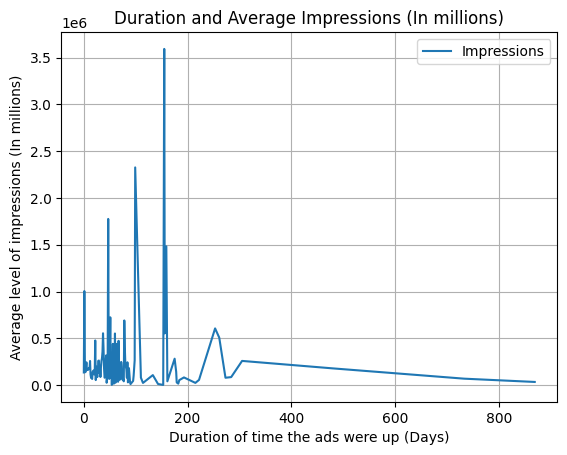

In [ ]:
avg_impressions = df.groupby("Duration")["Impressions"].mean().reset_index()
avg_impressions.plot(x = "Duration", y = "Impressions")

plt.title('Duration and Average Impressions (In millions)')
plt.xlabel("Duration of time the ads were up (Days)")
plt.ylabel("Average level of impressions (In millions)")
plt.grid()
plt.show()

### Ads that have been up for 1 year (365 days) or less - Removes focus on outliers

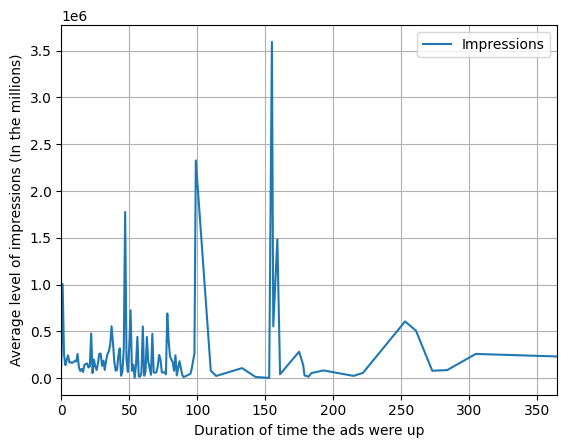

In [ ]:
#Ads that have been up for 1 year (365 days) or less - Removes focus on outliers
avg_impressions = df.groupby("Duration")["Impressions"].mean().reset_index()
avg_impressions.plot(x = "Duration", y = "Impressions")
plt.xlabel("Duration of time the ads were up")
plt.xlim(0,365)
plt.ylabel("Average level of impressions (In the millions)")
plt.grid()
plt.show()

### Discussion

We created a line graph which was used to visualize how much the duration of an ad (how many days the advertisement is up) impacts the average level of impressions the ad receives. The graph shows us that these political ads peak after about 100 days of being up, while declining over time with sudden increases every 50 days after. This information is useful because advertisers will know how often they should update their ads and how long they should remain up before removal in order to maximize their engagement.

## Question 3

Which countries and age brackets have the highest impressions-to-spend ratio? **(Pandas/Matplotlib)**

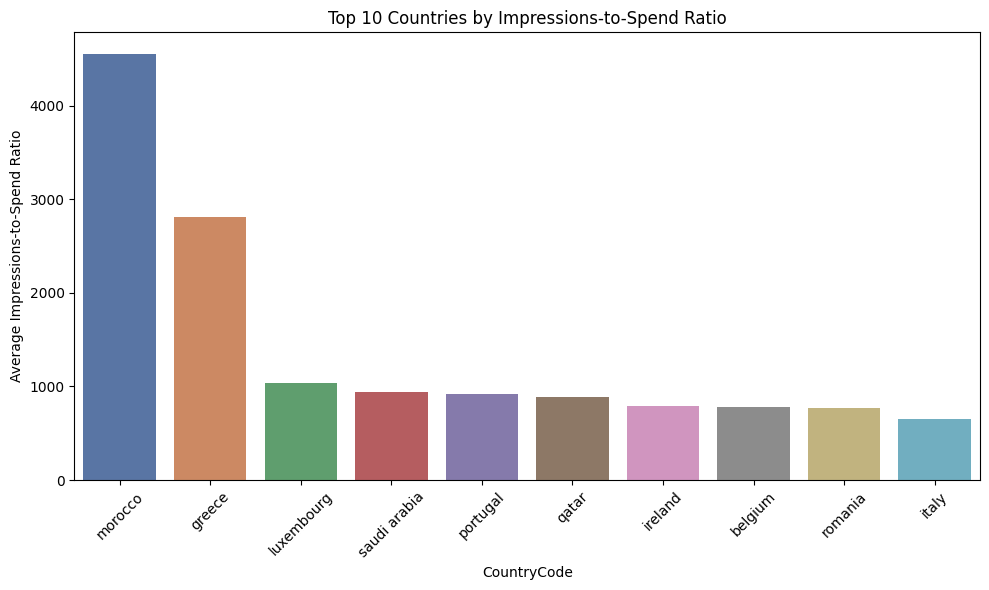

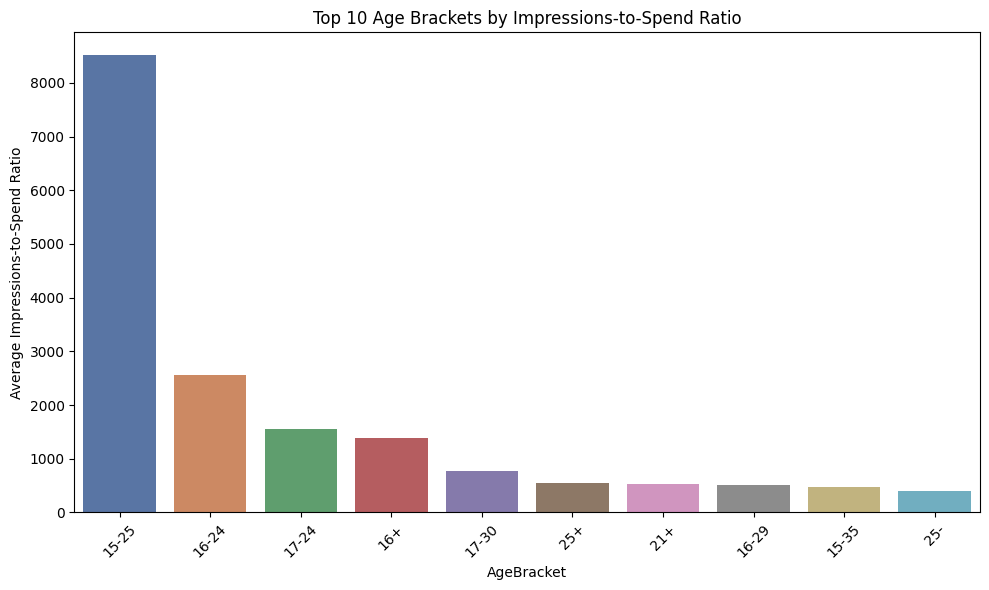

In [ ]:
#getting impressions to spend ratio
df['Impressions_to_Spend'] = df['Impressions'] / df['Spend']
df.loc[df['Spend'] == 0, 'Impressions_to_Spend'] = 0  #set ratio to 0 if Spend is 0 bcs I was getting inf for certain countries and it was messing up
#the graphs so this was the fix


df = df.dropna(subset=['Impressions_to_Spend']) #drop rows where impression to spend ratio is nan

#getting top 10 countries impression to spend ratio
top_countries = (df.groupby('CountryCode')['Impressions_to_Spend'].mean()
                 .reset_index().sort_values(by='Impressions_to_Spend', ascending=False).dropna().head(10)) #using groupby and agg functions also sorting

#getting top 10 age brackets impression 2 spend ratio
top_ages = (df.groupby('AgeBracket')['Impressions_to_Spend'].mean().reset_index()
            .sort_values(by='Impressions_to_Spend', ascending=False).dropna().head(10))


def plot(summary, category, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary, x=category, y='Impressions_to_Spend', hue=category ,palette='deep')
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel('Average Impressions-to-Spend Ratio')
    plt.xticks(rotation=45) #more readability

    plt.tight_layout()
    plt.show()

plot(top_countries, 'CountryCode', 'Top 10 Countries by Impressions-to-Spend Ratio')
plot(top_ages, 'AgeBracket', 'Top 10 Age Brackets by Impressions-to-Spend Ratio')

### Discussion

The goal of this question was to analyze the impressions-to-spend ratios for each country and each age bracket targeted. Determining the impression-to-spend ratios high ROI countries and age brackets can guide ad campaign into prioritizing ad target to these areas/age groups. As can be seen by the visualizations above in terms of the top 10 countries with the highest ratio, Jordan was the highest. Furthermore, in regards to age groups the age bracket 15-25 had the highest impression-to-spend ratio.

## Question 4

What factors (e.g age bracket, region, spending, language etc.) most influence the number of impressions an ad recieves? **(Linear Regression)**

In [ ]:
#Getting the frequency of each age bracket in the df to assess the general impact of age brackets

age_frequency = df['AgeBracket'].value_counts(normalize=True) #normalize to get proportions of each category relative to the df for consistent scaling
#if a certain age bracket occurs more frequently in the data it might correspond to higher impressions

df['AgeBracket_Frequency'] = df['AgeBracket'].map(age_frequency).fillna(0)

In [ ]:
X = df[['Spend', 'Gender', 'AgeBracket', 'OsType', 'Duration']]

X = pd.get_dummies(X,drop_first=True).astype("float32")

y = df['Impressions']

X.head()

,Spend,Duration,Gender_MALE,AgeBracket_15+,AgeBracket_15-18,AgeBracket_15-20,AgeBracket_15-25,AgeBracket_15-35,AgeBracket_16+,AgeBracket_16-20,...,AgeBracket_30-44,AgeBracket_30-49,AgeBracket_31+,AgeBracket_34-,AgeBracket_35+,AgeBracket_40-,AgeBracket_45-,AgeBracket_49-,OsType_IOS,OsType_WEB
0,1275.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,782.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1604.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Impressions   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:44:33   Log-Likelihood:            -1.5839e+05
No. Observations:               11145   AIC:                         3.169e+05
Df Residuals:                   11057   BIC:                         3.176e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.983e+04   2.34e+04  

Standard Deviation of Residuals: 359505.59172968334


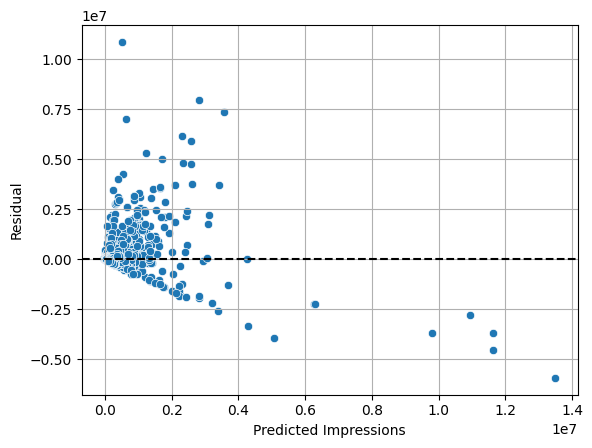

In [ ]:
yhat = model.predict()
residuals = y - yhat

print('Standard Deviation of Residuals:', np.std(residuals))

ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted Impressions")
plt.ylabel("Residual")

plt.grid(True)

### Discussion

This model does poorly at predicting impressions based on the variables provided. However, the regression does provide us with key insight into significant variables that impact overall impressions. One of those variables is spending on advertisement. There is a positive relationship with expenditure and impressions meaning that the more spent on the ad the more impressions likely to be seen. Another significant variable impacting engagement is age brackets, specifically 15-18, 16+, 17-29, 18-20. Targeting these age brackets as shown by the regression has significance in impacting overall impressions.

# 3. Conclusions


The results for our research has proven relevant in assessing which variables are impactful in improving engagement for political ads on the snapchat social media platform. Our first program helped create a visualization to determine whether targeted or nontargeted ads were more effective in increasing the level of impressions. We found that targeted age demographics was effective in increasing engagement unlike other factors such as region, or gender. Our second program was another visualization that showed us how long political ads should be up in order to maximize engagement, and we found that engagement peaked at around 100 days, with some outliers. Our third program was a visualization which showed us the impression-spend ratio of different countries and age group. We found that Jordan had the highest ratio, and that ages between 15-25 had the highest ratio. Our final program was a linear regression which showed us that there was a positive coefficient between the amount of spending on ads and the level of engagement, and it also showed that there was a positive coefficient between the ages of 15-18, 16+, 17-29,  and 18-20. Overall our analysis was effective in determining which variables should be prioritized when trying to improve engagement. Our visualizations gives our stakeholders a good understanding of where there focus should be in regards to increasing impressions on ads. We were able to sift through this complicated data set to develop a solid understanding of what factors our stakeholders should priorities.